# Классификация погоды

## Постановка задачи
Сделать классификацию погоды по регионам

## Подключение модулей

In [4]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

## Загрузка данных

In [7]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('weather_classification_data.csv', sep = ',')

In [8]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   
7          3.0        85         6.0               96.0  partly cloudy   
8          3.0        83         6.0               66.0       overcast   
9         28.0        74         8.5              107.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   
7                984.46         1  Winter              3.5    inland   
8                999.44         0  Winter              1.0  mountain   
9               1012.13         8  Winter              7.5   coastal   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
5       Cloudy  
6        Snowy  
7        Snowy  
8        Snowy  
9        Sunny

### Описание данных

Признаки:
- Temperature – температура в градусах Цельсия
- Humidity – процент влажности
- Wind Speed – скорость ветра
- Precipitation (%) – осадки (%)
- Cloud Cover – облачный покров
- Atmospheric Pressure	– атмосферное давление в ГПа
- UV Index – УФ-индекс
- Season – время года
- Visibility (km) – видимость (км)
- Location - местоположение

Целевой (искомый) признак:
- Weather Type - Целевая переменная для классификации, указывающая тип погоды.

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков 

In [13]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(13200, 11)

In [14]:
# выводим типы данных
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [15]:
# Целеовой признак - Weather Type

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [17]:
# имена колонок в виде списка
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [18]:
# сколько пропусков в колонке Cloud Cover ?
df['Cloud Cover'].isna().sum()

0

In [19]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Temperature = 0
Кол-во пропусков в колонке Humidity = 0
Кол-во пропусков в колонке Wind Speed = 0
Кол-во пропусков в колонке Precipitation (%) = 0
Кол-во пропусков в колонке Cloud Cover = 0
Кол-во пропусков в колонке Atmospheric Pressure = 0
Кол-во пропусков в колонке UV Index = 0
Кол-во пропусков в колонке Season = 0
Кол-во пропусков в колонке Visibility (km) = 0
Кол-во пропусков в колонке Location = 0
Кол-во пропусков в колонке Weather Type = 0


In [20]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [21]:
# сколько уникальных значений в колонке Season ? 
df['Season'].nunique()

4

In [22]:
# Какие это значения?
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [23]:
# какова статистика распределения этих значений? (сколько каких значений)
df['Cloud Cover'].value_counts(normalize=True)

Cloud Cover
overcast         0.461364
partly cloudy    0.345455
clear            0.162045
cloudy           0.031136
Name: proportion, dtype: float64

In [24]:
# замены категориальных значений на численные
df['Season_Type'] = df['Season']
d = {'Winter':0, 'Spring':1, 'Autumn':2, 'Summer':3}
df['Season_Type'] = df['Season_Type'].map(d)

df['Location_Type'] = df['Location']
d = {'inland':0, 'mountain':1, 'coastal':2}
df['Location_Type'] = df['Location_Type'].map(d)

df['Cloud_Cover'] = df['Cloud Cover']
d = {'overcast':0, 'partly cloudy':1, 'clear':2, 'cloudy':3}
df['Cloud_Cover'] = df['Cloud_Cover'].map(d)

df['Weather_Type'] = df['Weather Type']
d = {'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3}
df['Weather_Type'] = df['Weather_Type'].map(d)

In [26]:
# исследование целевого (target) признака - факта типа погоды
print('кол-во уникальных значений в таргете: ', df['Weather Type'].nunique())
print('перечень уникальных значений в таргете: ', df['Weather Type'].unique())
print('статистика распределения значений в таргете: \n', df['Weather Type'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  4
перечень уникальных значений в таргете:  ['Rainy' 'Cloudy' 'Sunny' 'Snowy']
статистика распределения значений в таргете: 
 Weather Type
Rainy     0.25
Cloudy    0.25
Sunny     0.25
Snowy     0.25
Name: proportion, dtype: float64


In [27]:

df['Temperature'].describe()

count    13200.000000
mean        19.127576
std         17.386327
min        -25.000000
25%          4.000000
50%         21.000000
75%         31.000000
max        109.000000
Name: Temperature, dtype: float64

In [28]:
# описательная статистика для всех (числовых) признаков
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)   Season_Type  \
count          13200.000000  13200.000000     13200.000000  13200.000000   
mean            1005.827896      4.005758         5.462917      1.141970   
std               37.199589      3.856600         3.371499      1.161677   
min              800.120000      0.000000         0.000000      0.000000   
25%              994.800000      1.000000         3.000000      0.000000   
50%             1007.650000      3.000000         5.000000      1.000000   
75%             1016.772500      7.000000         7.500000      2.000000   
max             1199.210000     14.000000        20.000000      3.000000   

       Location_Type   Cloud_Cover  Weather_Type  
count   13200.000000  13200.000000  13200.000000  
mean        0.905682      0.762955      1.500000  
std         0.791537      0.831755      1.118076  
min         0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.750000  
50%         1.000000      1.000000      1.500000  
75%         2.000000      1.000000      2.250000  
max         2.000000      3.000000      3.000000

In [29]:
# описательная статистика для всех (числовых) признаков
df.describe().T

count         mean        std     min     25%  \
Temperature           13200.0    19.127576  17.386327  -25.00    4.00   
Humidity              13200.0    68.710833  20.194248   20.00   57.00   
Wind Speed            13200.0     9.832197   6.908704    0.00    5.00   
Precipitation (%)     13200.0    53.644394  31.946541    0.00   19.00   
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.80   
UV Index              13200.0     4.005758   3.856600    0.00    1.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.00   
Season_Type           13200.0     1.141970   1.161677    0.00    0.00   
Location_Type         13200.0     0.905682   0.791537    0.00    0.00   
Cloud_Cover           13200.0     0.762955   0.831755    0.00    0.00   
Weather_Type          13200.0     1.500000   1.118076    0.00    0.75   

                          50%        75%      max  
Temperature             21.00    31.0000   109.00  
Humidity                70.00    84.0000   109.00  
Wind Speed               9.00    13.5000    48.50  
Precipitation (%)       58.00    82.0000   109.00  
Atmospheric Pressure  1007.65  1016.7725  1199.21  
UV Index                 3.00     7.0000    14.00  
Visibility (km)          5.00     7.5000    20.00  
Season_Type              1.00     2.0000     3.00  
Location_Type            1.00     2.0000     2.00  
Cloud_Cover              1.00     1.0000     3.00  
Weather_Type             1.50     2.2500     3.00

### Визуальный анализ

<Axes: xlabel='Weather_Type'>

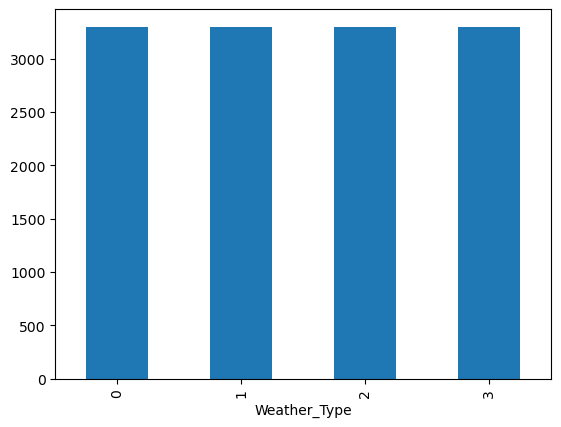

In [31]:
df['Weather_Type'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

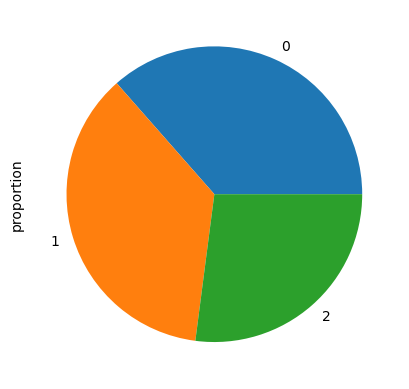

In [32]:
df['Location_Type'].value_counts(normalize=True).plot.pie()

In [33]:
df['Season_Type'].nunique()

4

<Axes: ylabel='Season_Type'>

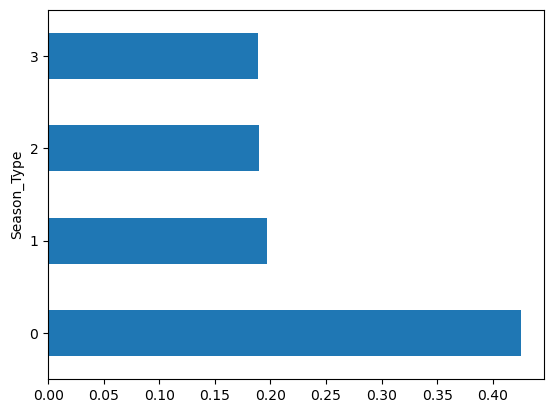

In [34]:
df['Season_Type'].value_counts(normalize=True,).plot.barh()

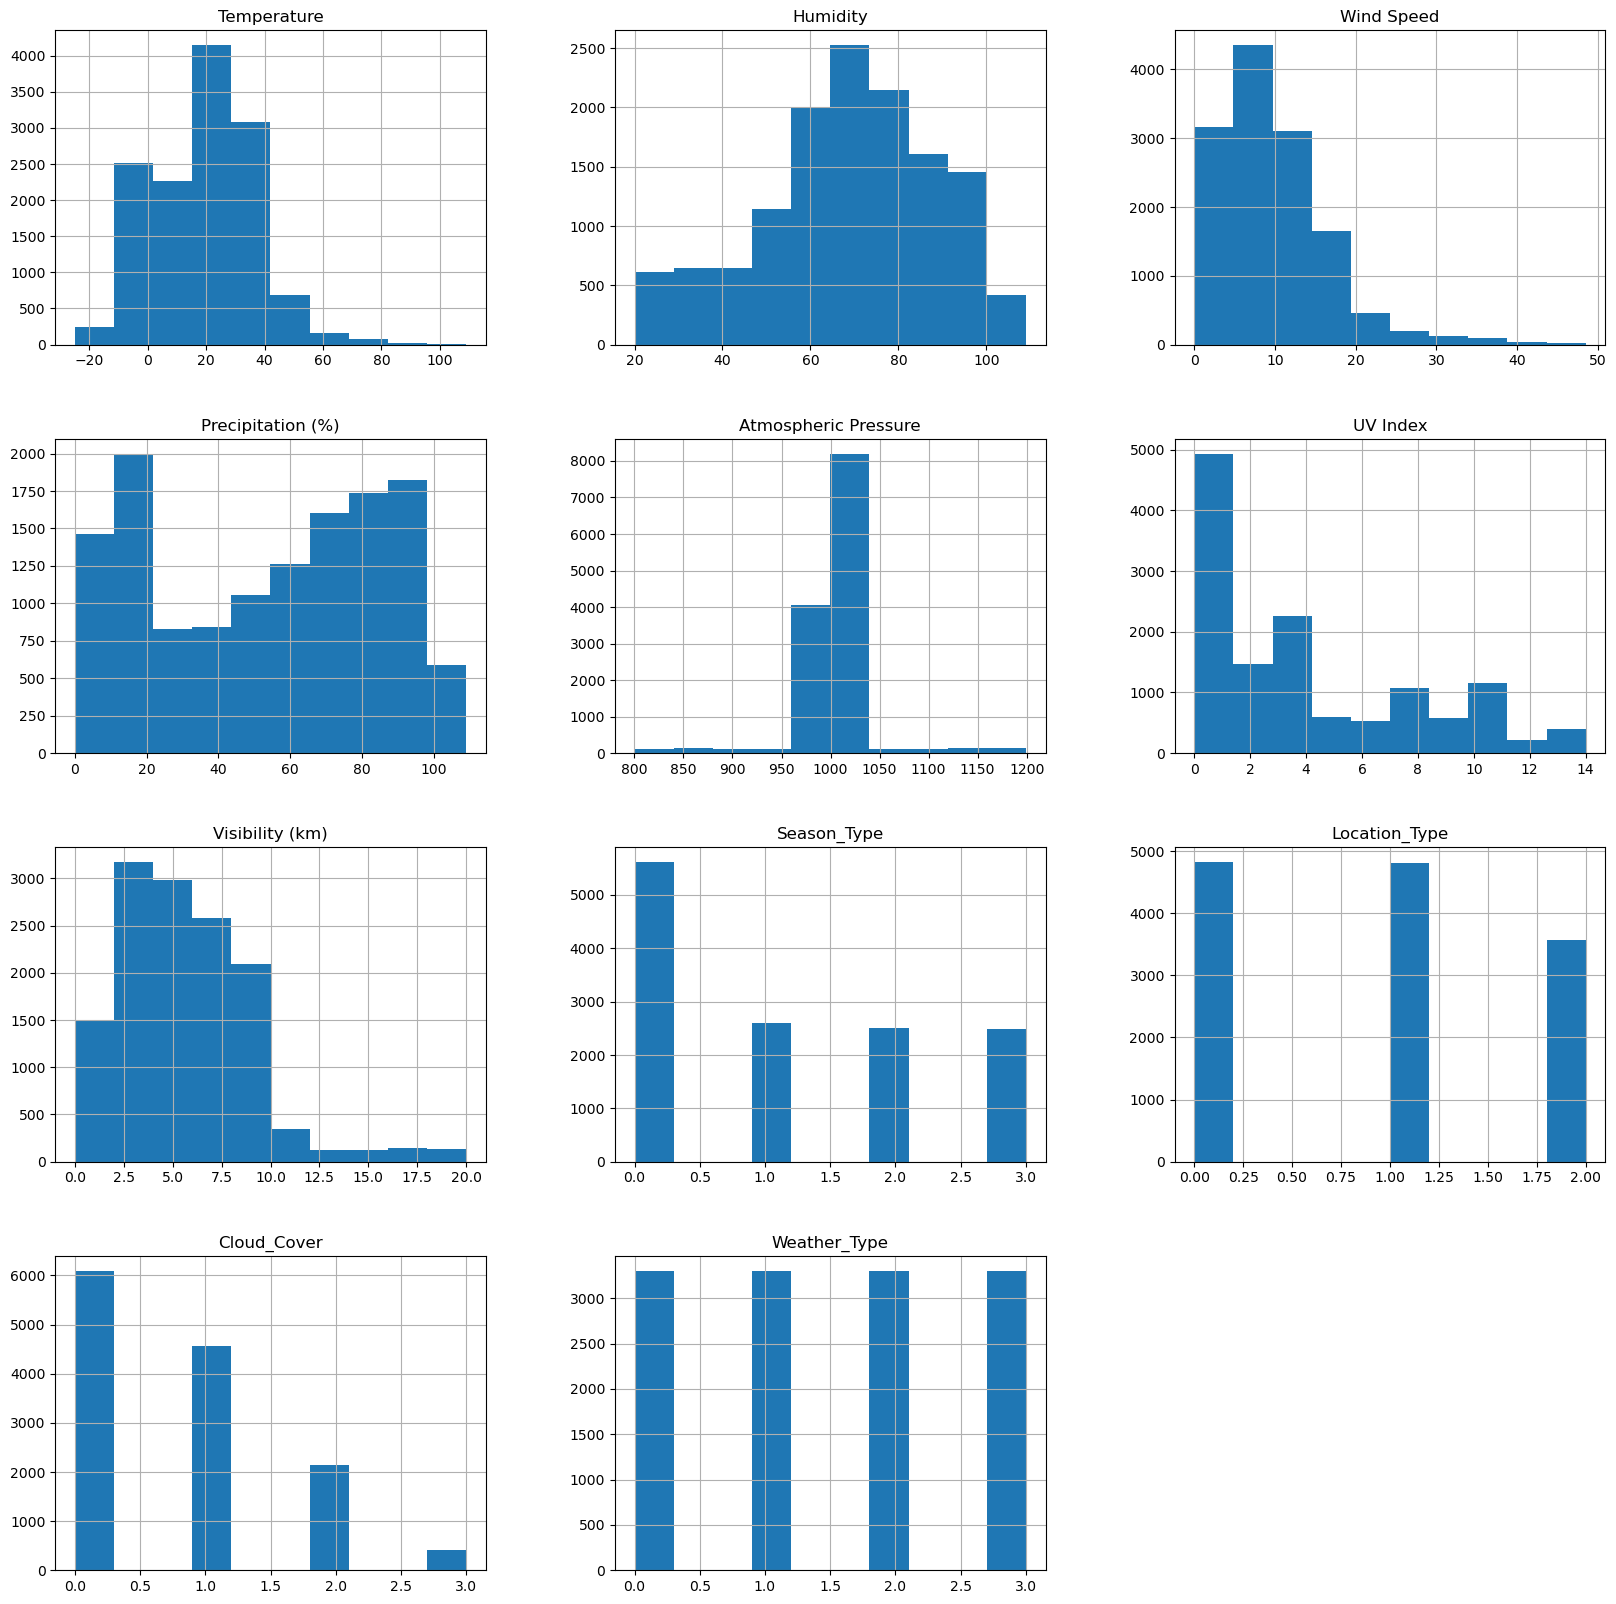

In [35]:
# гистаграммы всех признаков
df.hist(figsize=(20,20));

<Axes: >

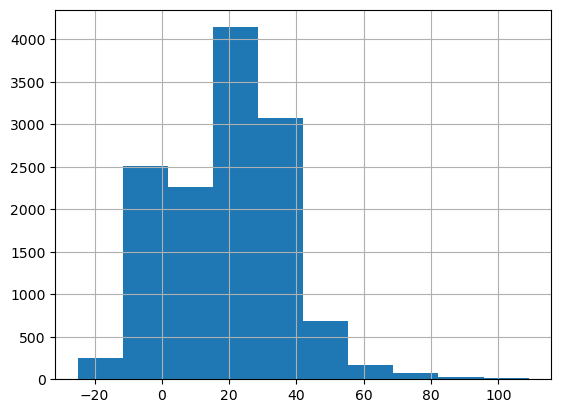

In [36]:
# гистаграмма для 1 признака
df['Temperature'].hist()

<Axes: >

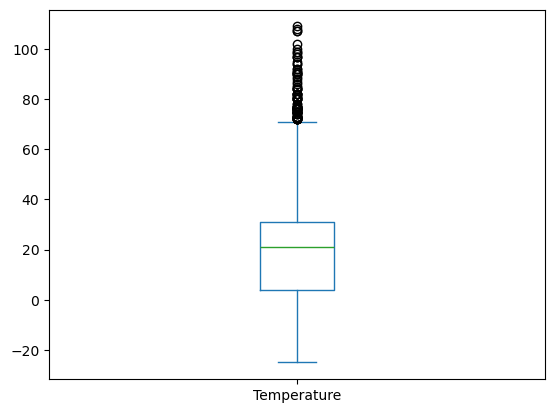

In [37]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Temperature'].plot.box()

<Axes: ylabel='Density'>

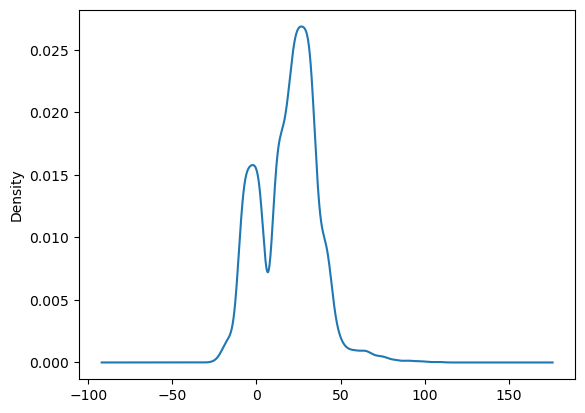

In [38]:
# график плотности распределения признака
df['Temperature'].plot.density()

<Axes: ylabel='Temperature'>

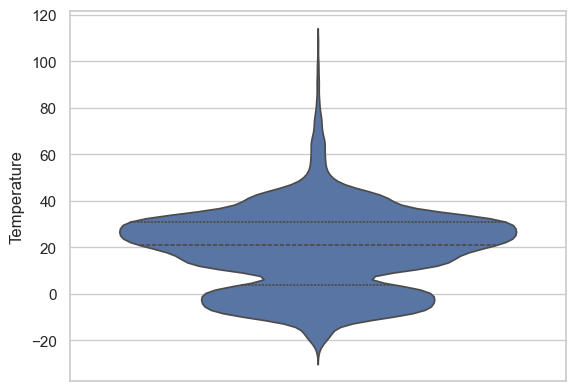

In [39]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Temperature"], inner="quartile")

### Двумерный анализ признаков

In [41]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)   Season_Type  \
count          13200.000000  13200.000000     13200.000000  13200.000000   
mean            1005.827896      4.005758         5.462917      1.141970   
std               37.199589      3.856600         3.371499      1.161677   
min              800.120000      0.000000         0.000000      0.000000   
25%              994.800000      1.000000         3.000000      0.000000   
50%             1007.650000      3.000000         5.000000      1.000000   
75%             1016.772500      7.000000         7.500000      2.000000   
max             1199.210000     14.000000        20.000000      3.000000   

       Location_Type   Cloud_Cover  Weather_Type  
count   13200.000000  13200.000000  13200.000000  
mean        0.905682      0.762955      1.500000  
std         0.791537      0.831755      1.118076  
min         0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.750000  
50%         1.000000      1.000000      1.500000  
75%         2.000000      1.000000      2.250000  
max         2.000000      3.000000      3.000000

In [42]:
# список признаков для анализа
two_analisis = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
               'Season_Type', 'Location_Type', 'Cloud_Cover', 'Weather_Type']

In [43]:
# матрица коррелаций

corr = df[two_analisis].corr()
corr

Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   
Season_Type              0.381422 -0.174724   -0.046682          -0.204950   
Location_Type            0.189524 -0.092175   -0.031476          -0.100080   
Cloud_Cover              0.354483 -0.450718   -0.267833          -0.431144   
Weather_Type            -0.407396 -0.081860   -0.172076          -0.055412   

                      Atmospheric Pressure  UV Index  Visibility (km)  \
Temperature                       0.209188  0.374773         0.250751   
Humidity                         -0.120653 -0.342694        -0.479969   
Wind Speed                       -0.077757 -0.068147        -0.311828   
Precipitation (%)                -0.177444 -0.291601        -0.457444   
Atmospheric Pressure              1.000000  0.154128         0.120182   
UV Index                          0.154128  1.000000         0.362922   
Visibility (km)                   0.120182  0.362922         1.000000   
Season_Type                       0.115970  0.206876         0.221317   
Location_Type                     0.062520  0.090593         0.104598   
Cloud_Cover                       0.151389  0.491863         0.409742   
Weather_Type                     -0.094754  0.058527         0.012547   

                      Season_Type  Location_Type  Cloud_Cover  Weather_Type  
Temperature              0.381422       0.189524     0.354483     -0.407396  
Humidity                -0.174724      -0.092175    -0.450718     -0.081860  
Wind Speed              -0.046682      -0.031476    -0.267833     -0.172076  
Precipitation (%)       -0.204950      -0.100080    -0.431144     -0.055412  
Atmospheric Pressure     0.115970       0.062520     0.151389     -0.094754  
UV Index                 0.206876       0.090593     0.491863      0.058527  
Visibility (km)          0.221317       0.104598     0.409742      0.012547  
Season_Type              1.000000       0.152329     0.196124     -0.383587  
Location_Type            0.152329       1.000000     0.103671     -0.202935  
Cloud_Cover              0.196124       0.103671     1.000000      0.101633  
Weather_Type            -0.383587      -0.202935     0.101633      1.000000

<Axes: >

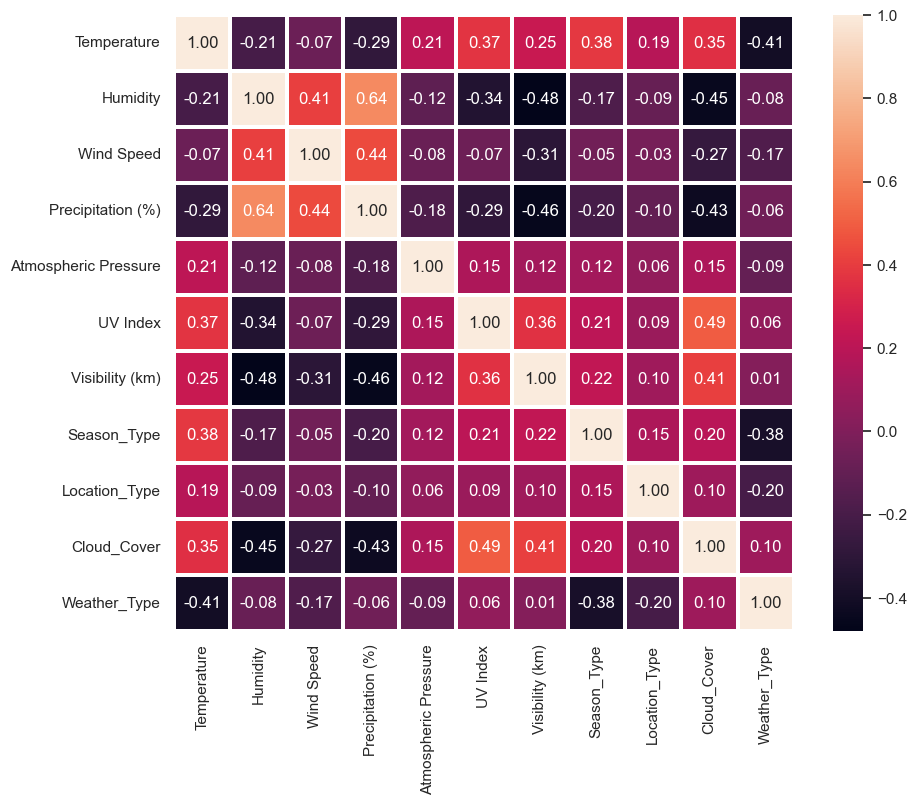

In [44]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

Описание:
Есть не большая зависимость между свойствами: Humidity и Precipitation (%).

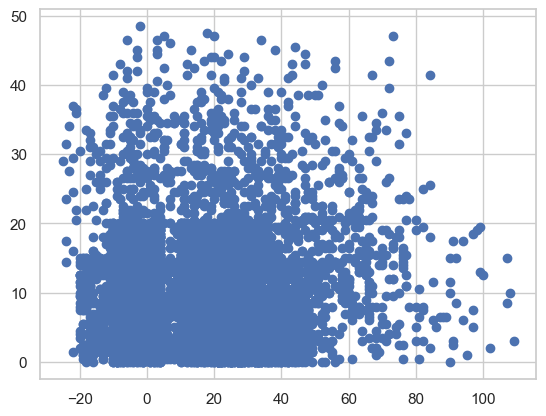

In [46]:
# диаграмма рассеяния для 2х признаков
plt.scatter(df['Temperature'], df['Wind Speed'])

<Axes: xlabel='Temperature', ylabel='Wind Speed'>

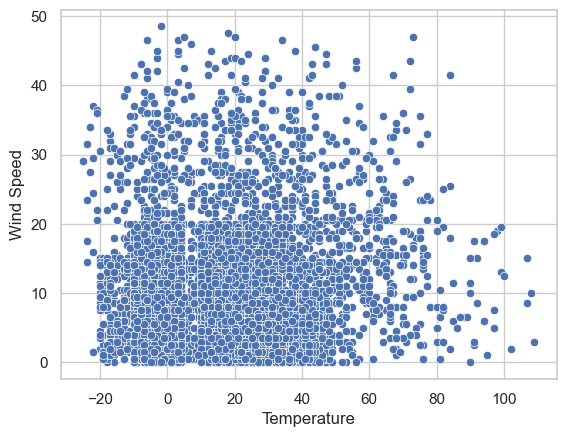

In [47]:
# диаграмма рассеяния для 2х признаков средствами библиотеки seaborn 
sns.scatterplot(data=df, x="Temperature", y="Wind Speed")

<Axes: xlabel='Temperature', ylabel='Wind Speed'>

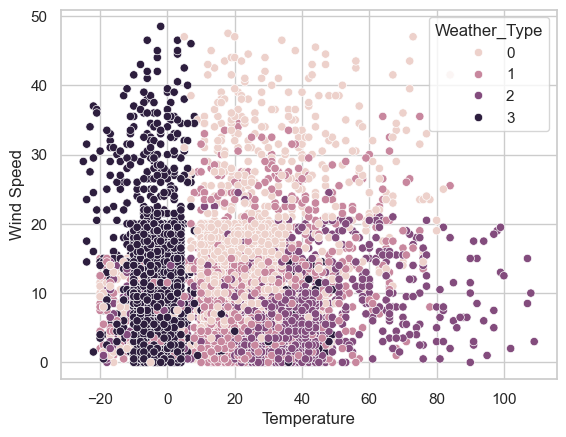

In [48]:
# цвета точек зависят от класса объекта
sns.scatterplot(data=df, x="Temperature", y="Wind Speed", hue="Weather_Type")

<Axes: xlabel='Temperature', ylabel='Humidity'>

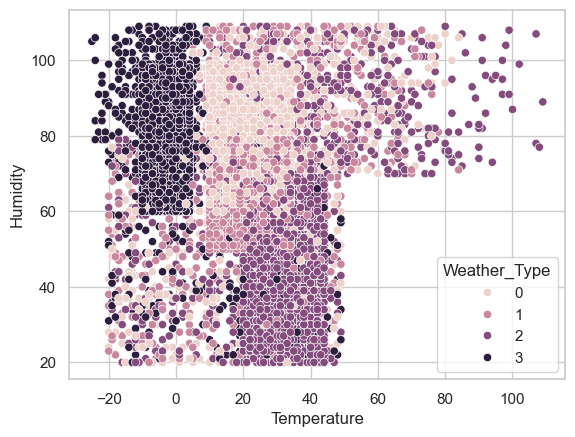

In [49]:
sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Weather_Type")

<Axes: xlabel='Humidity', ylabel='Precipitation (%)'>

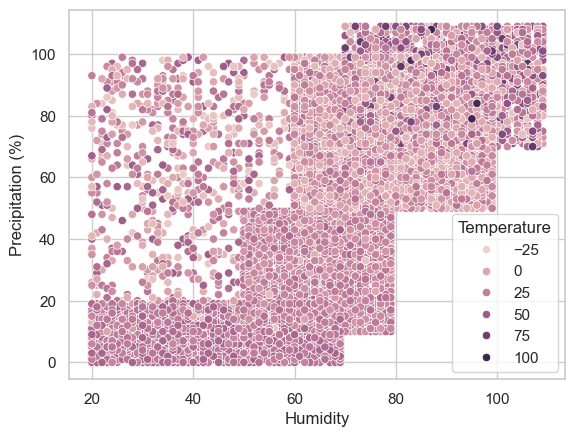

In [50]:
sns.scatterplot(data=df, x="Humidity", y="Precipitation (%)", hue="Temperature")

<Axes: xlabel='Humidity', ylabel='Precipitation (%)'>

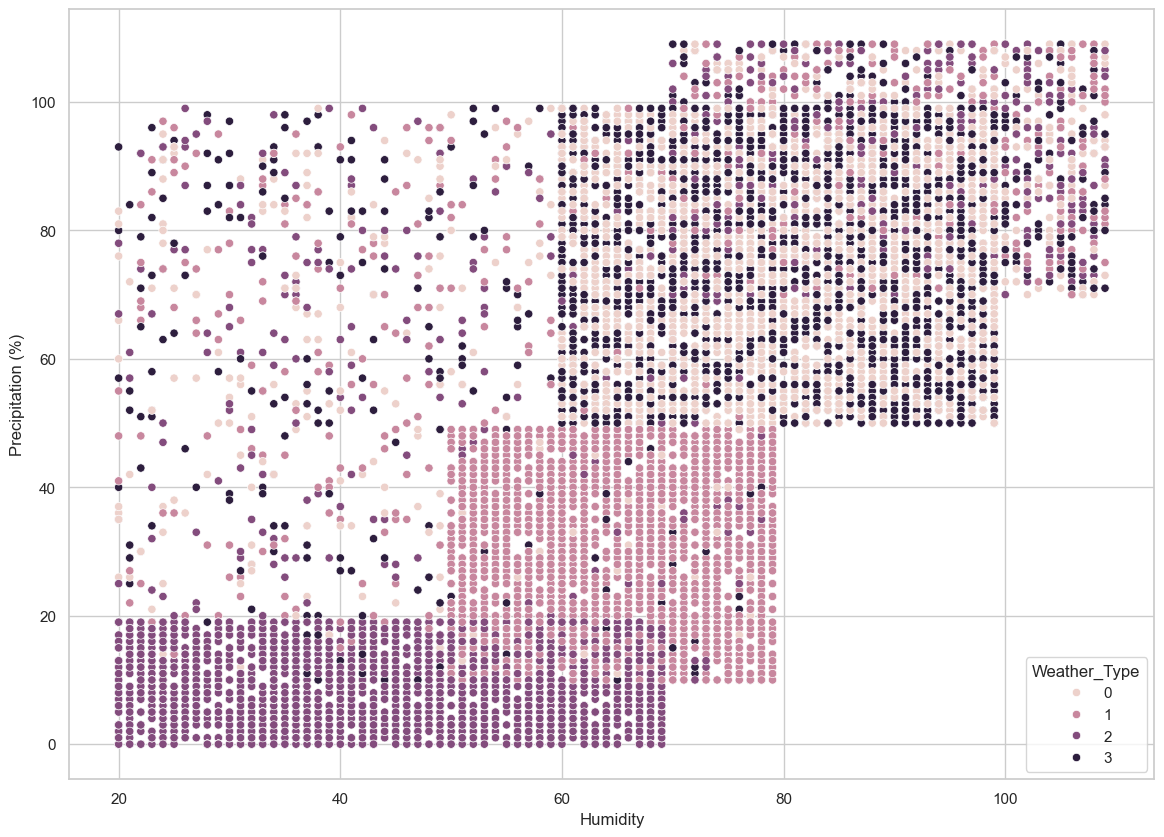

In [51]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="Humidity", y="Precipitation (%)", hue="Weather_Type")

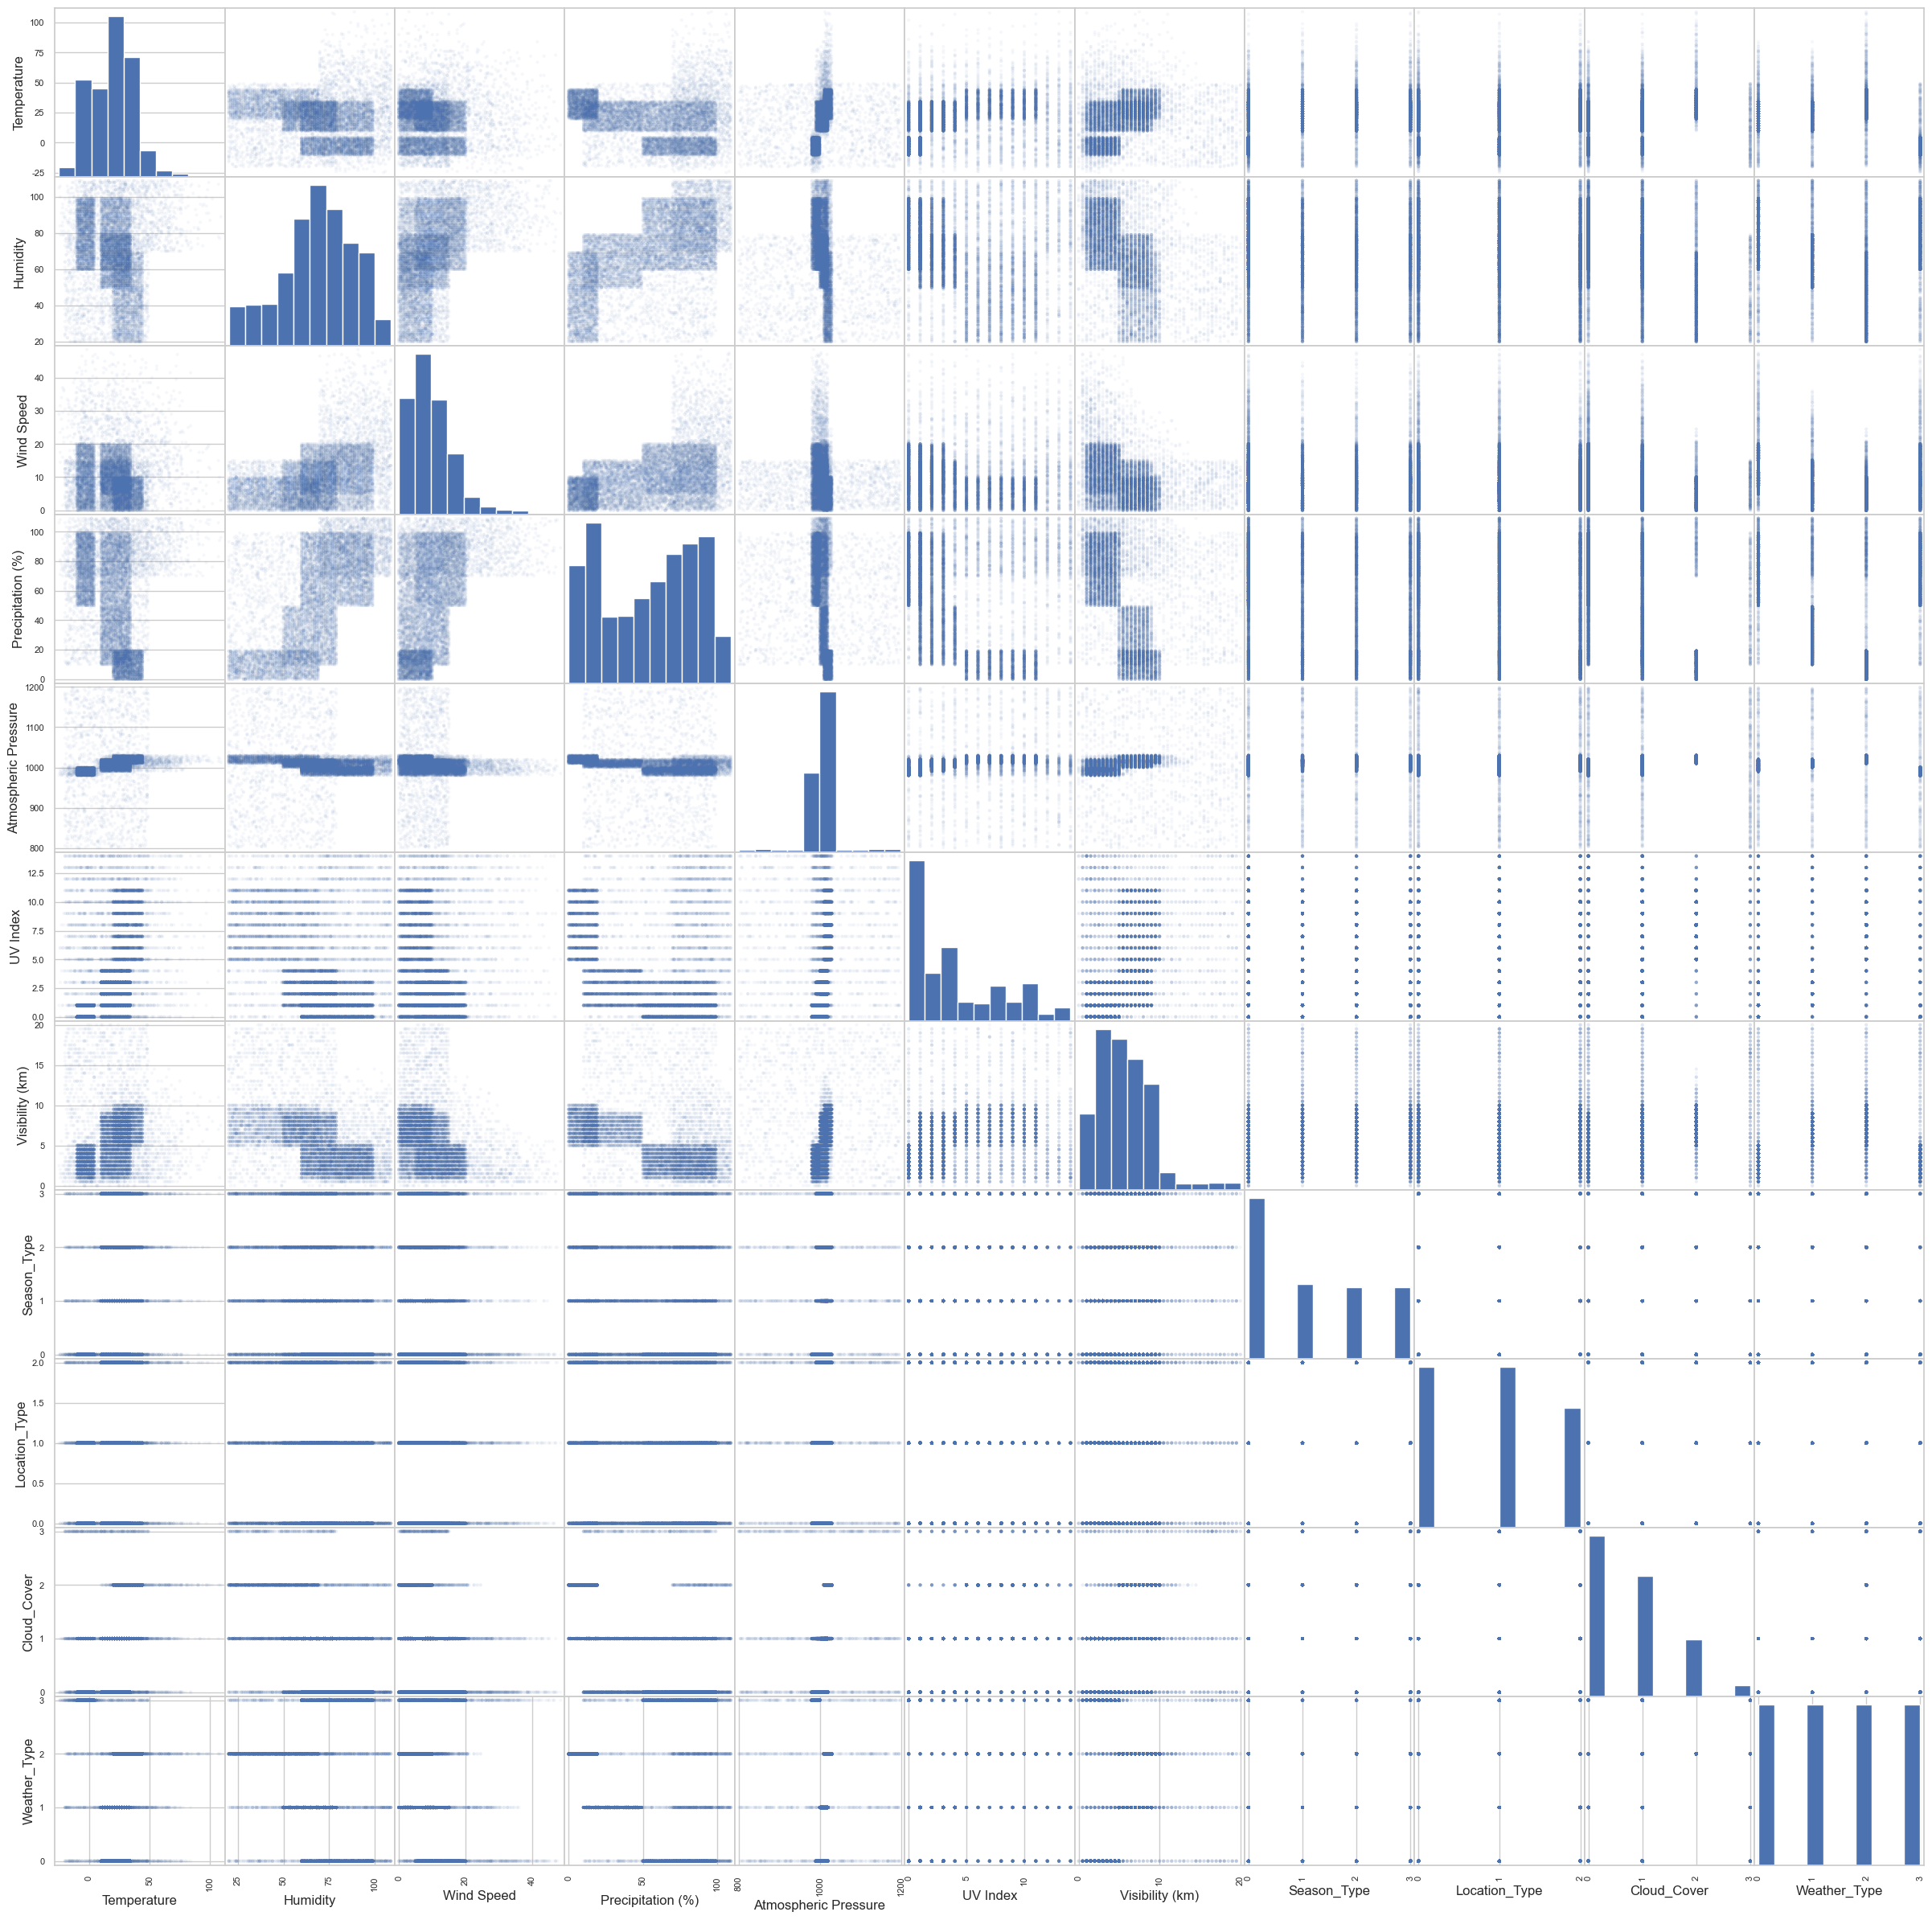

In [52]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[two_analisis], alpha=0.05, figsize=(30, 30));

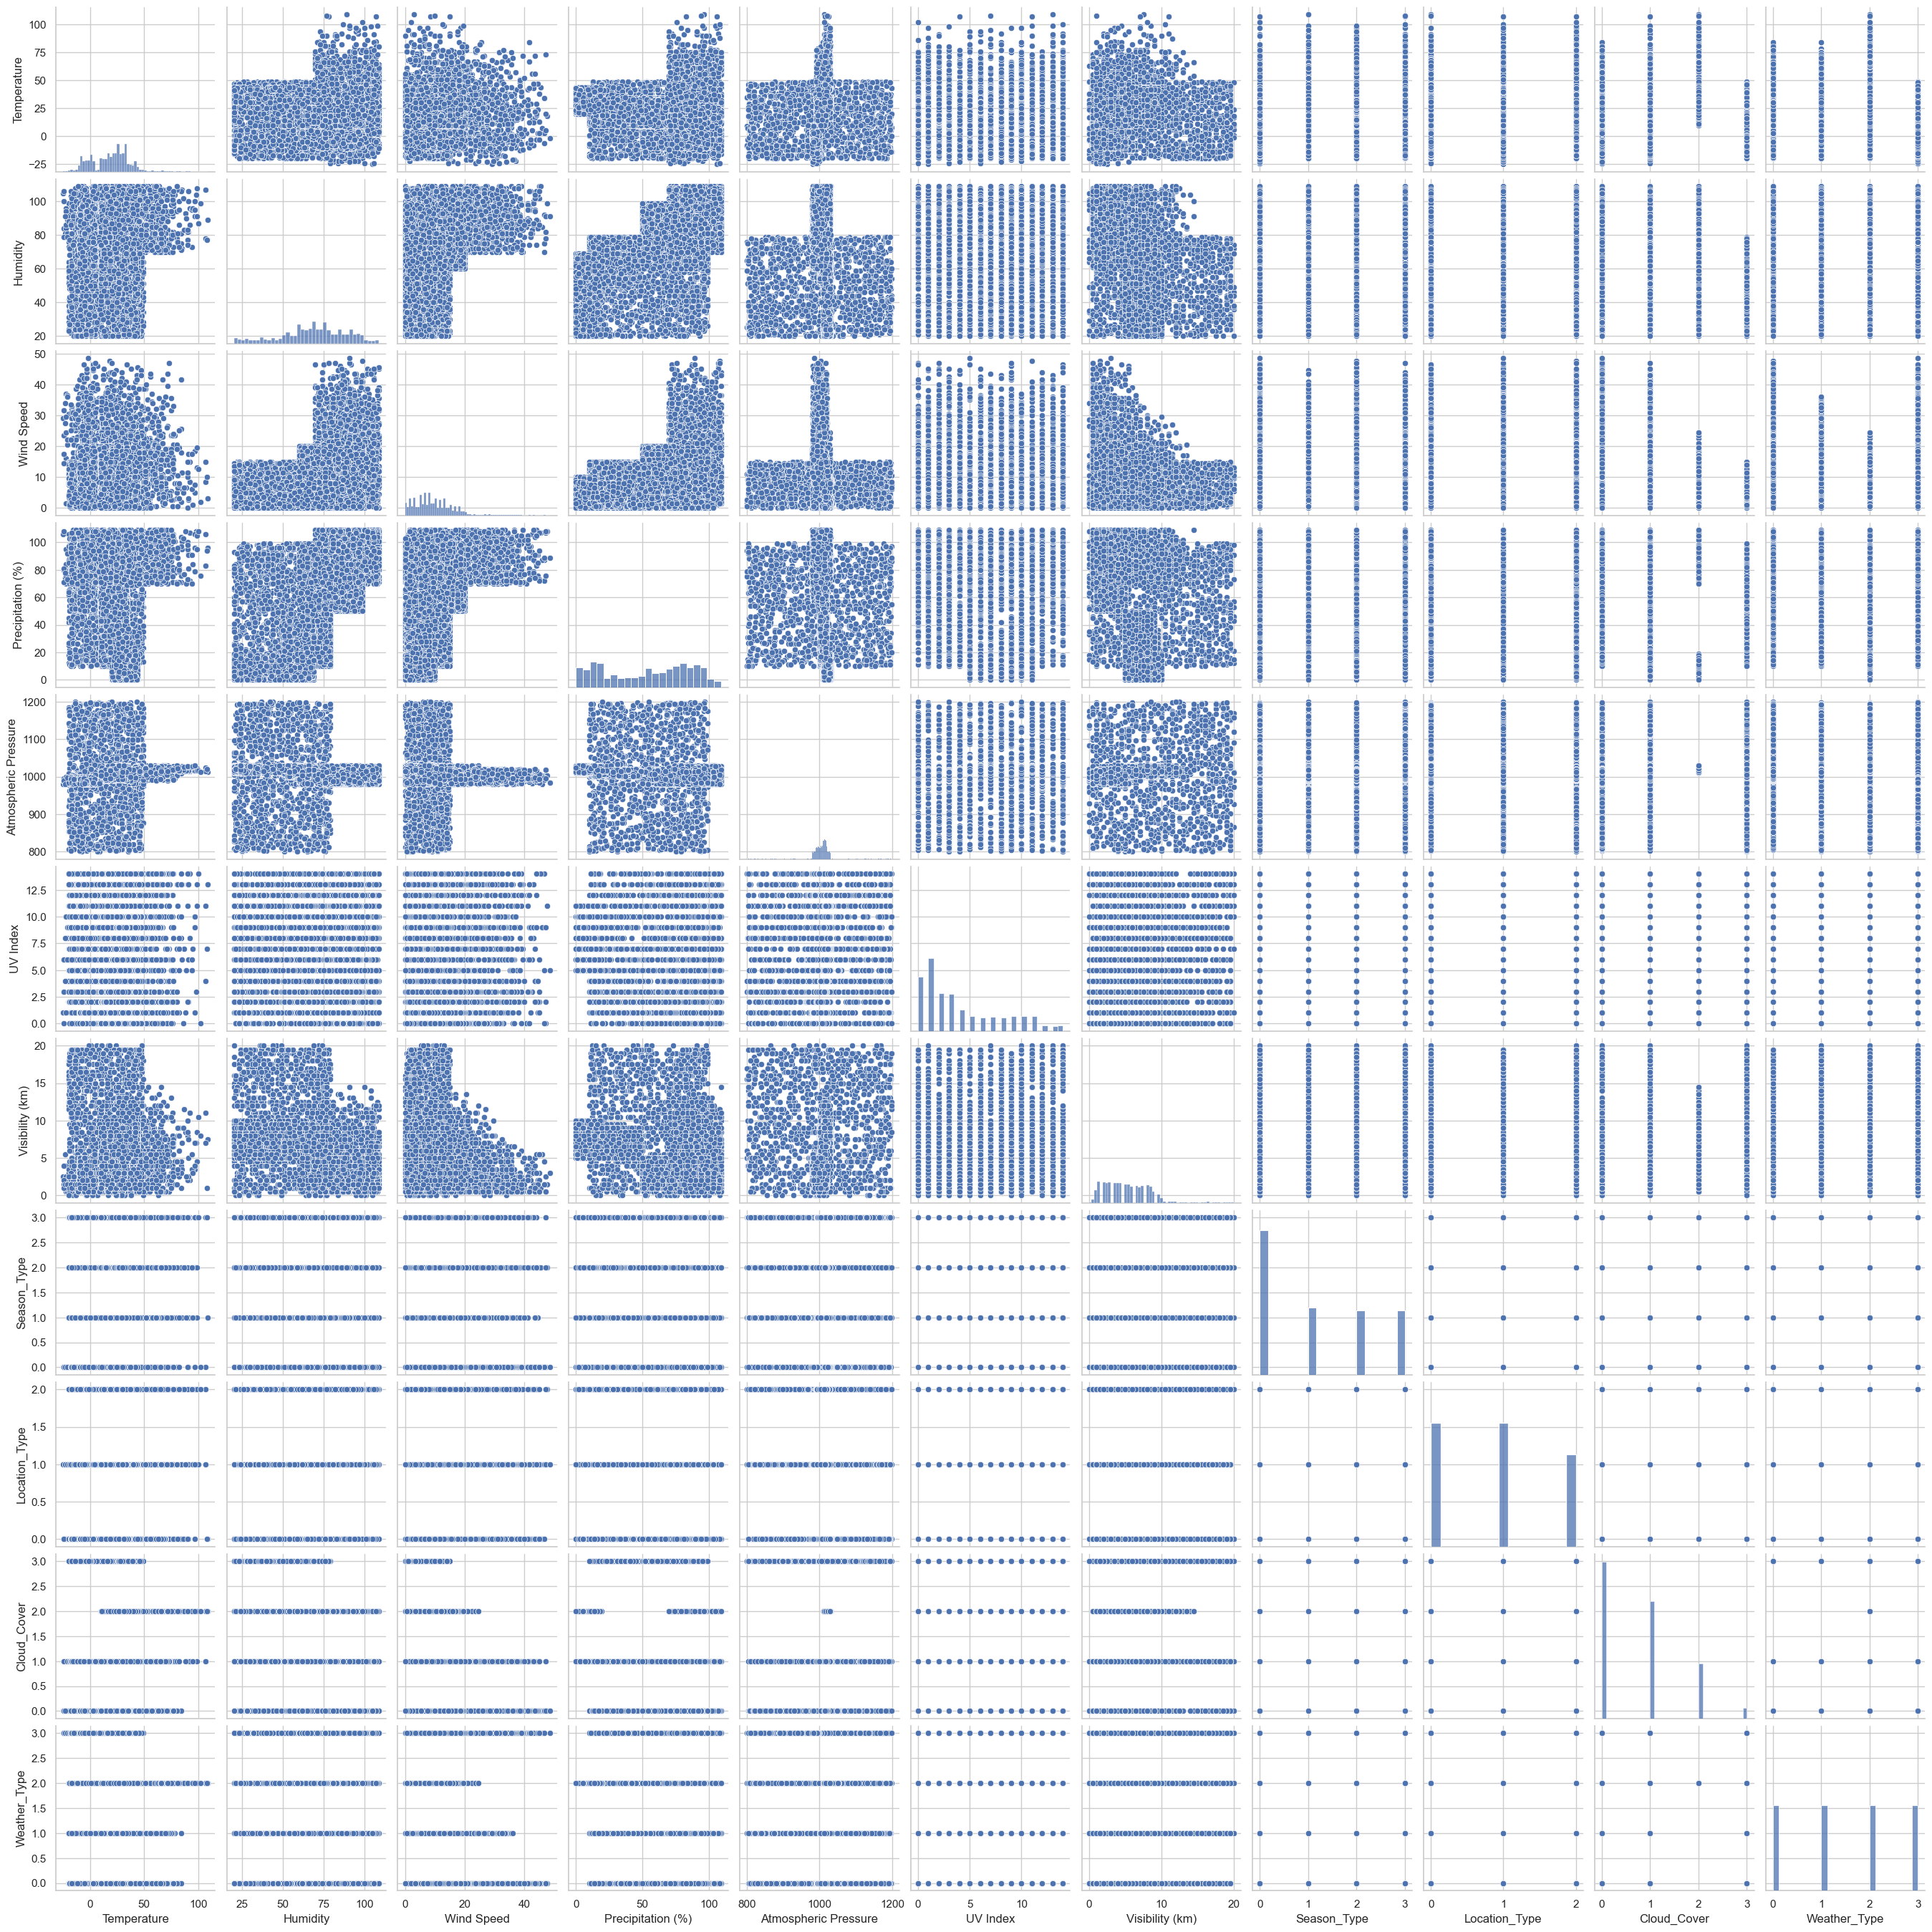

In [53]:
sns.pairplot(df[two_analisis])

[Text(1, 0, 'Humidity'), Text(2, 0, 'Temperature')]

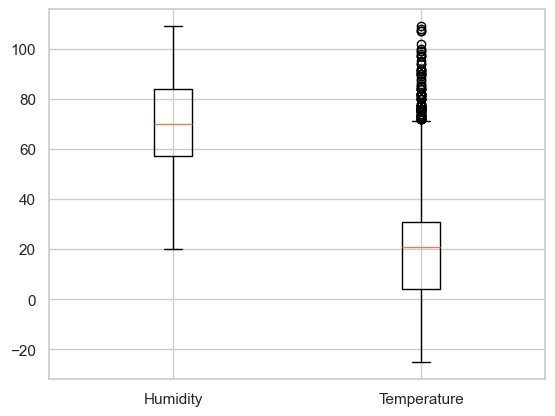

In [54]:
# два бокс-плота на одном графике - построение с помощью matplotlib
my_dict = {'Humidity': df['Humidity'], 'Temperature': df['Temperature']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

<Axes: xlabel='Season', ylabel='Temperature'>

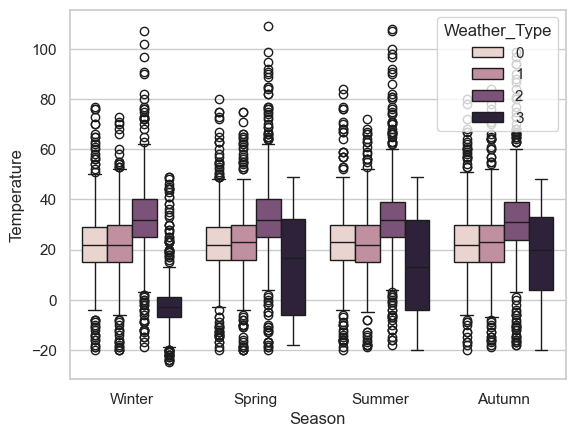

In [55]:
sns.boxplot(data=df, y="Temperature", x="Season", hue="Weather_Type")

<Axes: xlabel='Season', ylabel='Temperature'>

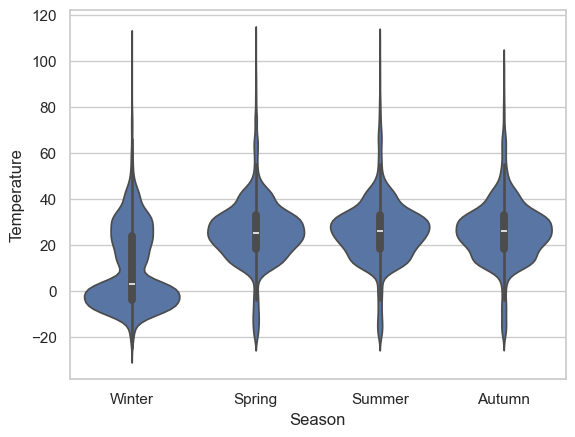

In [56]:
sns.violinplot(data=df, y="Temperature", x="Season")

### Многомерный анализ признаков

In [58]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  Season_Type  Location_Type  Cloud_Cover  Weather_Type  
0        Rainy            0              0            1             0  
1       Cloudy            1              0            1             1  
2        Sunny            1              1            2             2  
3        Sunny            1              2            2             2  
4        Rainy            0              1            0             0

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Преобразование типов

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
 11  Season_Type           13200 non-null  int64  
 12  Location_Type         13200 non-null  int64  
 13  Cloud_Cover           13200 non-null  int64  
 14  Weather_Type          13200 non-null  int64  
dtypes: float64(5), int6

In [65]:
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   
7          3.0        85         6.0               96.0  partly cloudy   
8          3.0        83         6.0               66.0       overcast   
9         28.0        74         8.5              107.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   
7                984.46         1  Winter              3.5    inland   
8                999.44         0  Winter              1.0  mountain   
9               1012.13         8  Winter              7.5   coastal   

  Weather Type  Season_Type  Location_Type  Cloud_Cover  Weather_Type  
0        Rainy            0              0            1             0  
1       Cloudy            1              0            1             1  
2        Sunny            1              1            2             2  
3        Sunny            1              2            2             2  
4        Rainy            0              1            0             0  
5       Cloudy            3              0            0             1  
6        Snowy            0              0            0             3  
7        Snowy            0              0            1             3  
8        Snowy            0              1            0             3  
9        Sunny            0              2            2             2

### Выявление выбросов

In [67]:
out_columns = ['Temperature', 'Humidity', 'Precipitation (%)', 'Atmospheric Pressure']

In [68]:
df[out_columns].describe()

Temperature      Humidity  Precipitation (%)  Atmospheric Pressure
count  13200.000000  13200.000000       13200.000000          13200.000000
mean      19.127576     68.710833          53.644394           1005.827896
std       17.386327     20.194248          31.946541             37.199589
min      -25.000000     20.000000           0.000000            800.120000
25%        4.000000     57.000000          19.000000            994.800000
50%       21.000000     70.000000          58.000000           1007.650000
75%       31.000000     84.000000          82.000000           1016.772500
max      109.000000    109.000000         109.000000           1199.210000

### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [70]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
location_cols = pd.get_dummies(df["Location"], dtype=int)
location_cols.head()

coastal  inland  mountain
0        0       1         0
1        0       1         0
2        0       0         1
3        1       0         0
4        0       0         1

In [71]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
season_cols = pd.get_dummies(df["Season"], dtype=int)
season_cols.head()

Autumn  Spring  Summer  Winter
0       0       0       0       1
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       0       0       1

In [72]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
cloud_cover_cols = pd.get_dummies(df["Cloud Cover"], dtype=int)
cloud_cover_cols.head()

clear  cloudy  overcast  partly cloudy
0      0       0         0              1
1      0       0         0              1
2      1       0         0              0
3      1       0         0              0
4      0       0         1              0

In [73]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
weather_type_cols = pd.get_dummies(df["Weather Type"], dtype=int)
weather_type_cols.head()

Cloudy  Rainy  Snowy  Sunny
0       0      1      0      0
1       1      0      0      0
2       0      0      0      1
3       0      0      0      1
4       0      1      0      0

### Формирование дата-сета для обучения моделей

In [75]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  Season_Type  Location_Type  Cloud_Cover  Weather_Type  
0        Rainy            0              0            1             0  
1       Cloudy            1              0            1             1  
2        Sunny            1              1            2             2  
3        Sunny            1              2            2             2  
4        Rainy            0              1            0             0

In [76]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index','Visibility (km)']

In [77]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], season_cols], axis = 1)
X.shape

(13200, 11)

In [78]:
X.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km)  Autumn  Spring  Summer  Winter  
0         2              3.5       0       0       0       1  
1         7             10.0       0       1       0       0  
2         5              5.5       0       1       0       0  
3         7              1.0       0       1       0       0  
4         1              2.5       0       0       0       1

In [79]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Weather_Type']

In [80]:
df['Weather_Type'].value_counts()

Weather_Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64

### Моделирование

In [82]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8844, 11) (4356, 11) (8844,) (4356,)


In [84]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 28.7 ms


KNeighborsClassifier()

In [88]:
# making prediction
knn.predict(X_test[:20])

array([2, 2, 2, 3, 2, 3, 0, 0, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [89]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([2, 2, 2, 3, 2, 3, 0, 0, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [90]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.9235639981908639
test accuracy:  0.8877410468319559


In [91]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

In [93]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [95]:
cm1 = confusion_matrix(y_test, y_test_predict)
cm1

array([[ 973,   63,   28,   14],
       [  98,  882,   48,   26],
       [  63,   56,  954,   27],
       [  24,   24,   18, 1058]], dtype=int64)

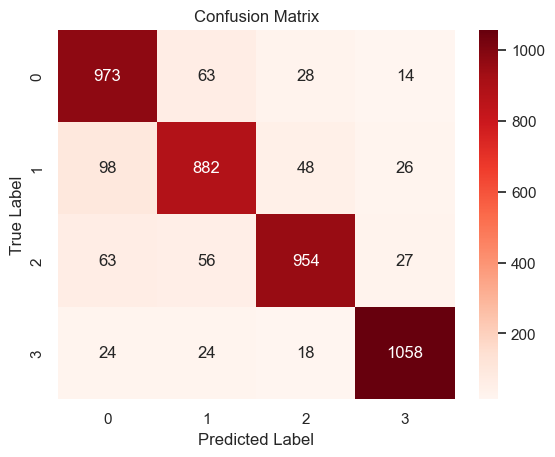

In [96]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 14 ms


GaussianNB()

In [100]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([2, 0, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [105]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8094582185491277

In [106]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

In [110]:
# performance measurement
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [113]:
cm2 = confusion_matrix(y_test, y_test_predict)
cm2

array([[ 773,   29,   64,  212],
       [ 113,  775,   83,   83],
       [  91,   49,  934,   26],
       [   6,   14,   60, 1044]], dtype=int64)

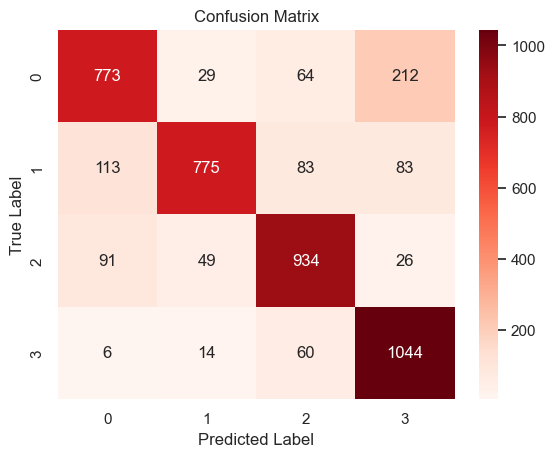

In [115]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest Classifier (Классификатор дерева решений)

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 266 ms
Wall time: 475 ms


In [124]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([2, 2, 2, 3, 2, 3, 0, 0, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [127]:
# performance measurement
from sklearn.metrics import accuracy_score


In [129]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

In [134]:
# performance measurement
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [137]:
cm3 = confusion_matrix(y_test, y_test_predict)
cm3

array([[ 983,   52,   28,   15],
       [  65,  923,   46,   20],
       [  36,   53,  986,   25],
       [  14,   29,   24, 1057]], dtype=int64)

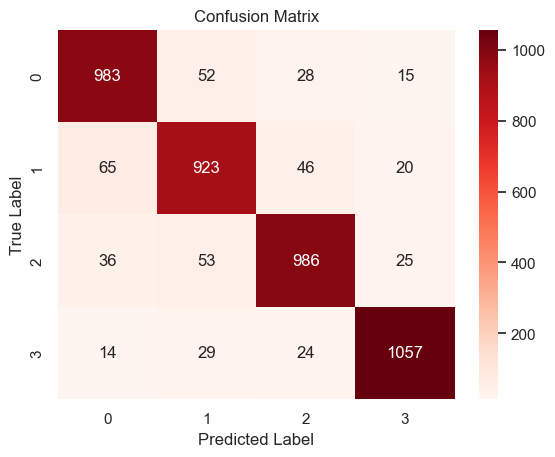

In [138]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Logistic Regression (Логистическая регрессия)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 60.7 ms


LogisticRegression(random_state=42)

In [143]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([2, 2, 2, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [144]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.8544536271808999

In [145]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

In [148]:
# performance measurement
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [150]:
cm4 = confusion_matrix(y_test, y_test_predict)
cm4

array([[ 905,   51,   37,   85],
       [  96,  858,   67,   33],
       [  81,   81,  907,   31],
       [  10,   30,   32, 1052]], dtype=int64)

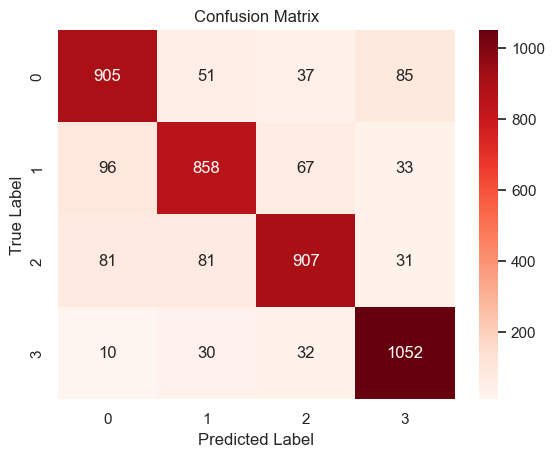

In [152]:
sns.heatmap(cm4, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Метрики классификации

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [ ]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [ ]:
log

In [ ]:
# посмотреть по большему колличеству параметров
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### Confusion matrix (матрица ошибок)

Можно просмотреть выше, какая модель предсказывает с большоей вероятностью

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)
cm

### Визуализация confusion matrix

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Accuracy (Точность)

In [ ]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

### Полная информация

In [ ]:
print(classification_report( y_test, y_test_predict))

In [ ]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Gaussian Naive Bayes

In [ ]:
y_train_predict_gnb = gnb.predict(X_train)
y_test_predict_gnb = gnb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_test_predict_gnb)
cm

In [ ]:
print(classification_report( y_test, y_test_predict_gnb))

### Random Forest Classifier

In [ ]:
y_train_predict_rfc = rfc.predict(X_train)
y_test_predict_rfc = rfc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_test_predict_rfc)
cm

In [ ]:
print(classification_report( y_test, y_test_predict_gnb))

### Логическая Регресия

In [ ]:
y_train_predict_lr = lr.predict(X_train)
y_test_predict_lr = lr.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_test_predict_lr)
cm

In [ ]:
print(classification_report( y_test, y_test_predict_lr))

In [ ]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log

### Вывод

Входе работы были проведены следующие действия:

1.Подключение необходимых данных

2.Загружаем данные

3.Проводим анализ наших имеющихся данных

4.Проводим обучение на тестовых данных

5.Работаем с обучением моделей, и его предсказываниями(вытекающий из 4п.)



Я считаю что модель: Random Forest Classifier - справилась лучше всего, так же это видно по графику выше.
Данная модель показывает хорошую работу с большим набором данных, и зависимостями.
